# 1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

## 파이토치 시작하기

In [1]:
import torch

- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두 개 만들고 행으로 병합, 열로 병합


In [34]:
X=torch.Tensor([[0,0,0], [1,1,1], [2,2,2], [3,3,3]])
Y=torch.Tensor([[0,0,0], [1,1,1], [2,2,2], [3,3,3]])

# 행으로 병합 코드
A = torch.cat([X, Y], dim=1)
print(A.shape)
# 열로 병합 코드
B = torch.cat([X, Y], dim=0)
print(B.shape)

torch.Size([4, 6])
torch.Size([8, 3])


### Linear Regression Implementation from Scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [35]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [36]:
def synthetic_data(w, b, num_examples):                     #합성 데이터 생성을 위한 함수 정의
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))          #평균이 0, 분산이 1인 distribution에서 x 생성
    y = torch.matmul(X, w) + b                              #X, w 두 텐서의 행렬 곱 연산으로 실제 y 반환
    y += torch.normal(0, 0.01, y.shape)                     #노이즈 추가
    return X, y.reshape((-1, 1))                            #y와 X를 반환

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000)     #2000개의 합성 데이터 생성

In [37]:
print('features:', features[0],'\nlabel:', labels[0])       #완성된 데이터 샘플 뽑아보기

features: tensor([2.3833, 0.4287]) 
label: tensor([11.9974])


In [38]:
#미니 배치 단위로 연산하기 위해 데이터 읽기
def data_iter(batch_size, features, labels):
    num_examples = len(features)            #데이터의 총 개수
    indices = list(range(num_examples))     #인덱스 생성
    # The examples are read at random, in no particular order
    random.shuffle(indices)                 #인덱스 섞기 -> 배치 데이터 무작위 선정
    # Iterating over the shuffled indices, taking `batch_size` steps at a time
    for i in range(0, num_examples, batch_size):
        # Get the indices for the current batch
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        # Yield the features and labels corresponding to the current batch
        yield features[batch_indices], labels[batch_indices]

In [39]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.7334, -1.5842],
        [ 0.4263, -0.5977],
        [ 1.2221, -0.4896],
        [ 0.9910, -0.4468],
        [-0.7130,  0.5485],
        [-0.0989,  1.6589],
        [ 1.2651, -0.1808],
        [ 0.5641, -0.7883],
        [ 0.0271, -0.3051],
        [ 1.3126, -0.1260],
        [-1.0610, -2.6123],
        [ 0.8743,  0.7056],
        [-0.3634, -0.2259],
        [-0.5597, -1.3245],
        [-0.5981, -0.2971],
        [-1.0440,  0.0247],
        [-0.0662,  0.6449],
        [ 3.0548, -1.0739],
        [-1.6617,  0.0760],
        [-0.1320, -1.1923]]) 
 tensor([[10.0913],
        [ 7.6640],
        [ 9.9010],
        [ 9.1160],
        [ 2.5494],
        [ 2.7150],
        [ 9.5742],
        [ 8.3702],
        [ 6.0172],
        [ 9.6138],
        [ 6.2457],
        [ 7.0633],
        [ 4.7574],
        [ 5.8078],
        [ 4.1592],
        [ 2.3120],
        [ 4.3301],
        [16.2712],
        [ 0.4001],
        [ 6.9035]])


In [40]:
#파라미터 초기화
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
#b = torch.tensor([3])
b = torch.zeros(1, requires_grad=True)

In [41]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X, w) + b

In [42]:
def squared_loss(y_hat, y):
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [43]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [44]:
lr = 0.01             # learning rate
num_epochs = 20         # Number of iterations
net = linreg            # 위에서 가져오기
loss = squared_loss     # 위에서 가져오기

save_w_and_loss = []
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
        save_w_and_loss.append(w.squeeze().tolist() + [float(train_l.mean())])

epoch 1, loss 2.811687
epoch 2, loss 0.387243
epoch 3, loss 0.053385
epoch 4, loss 0.007406
epoch 5, loss 0.001065
epoch 6, loss 0.000192
epoch 7, loss 0.000072
epoch 8, loss 0.000055
epoch 9, loss 0.000053
epoch 10, loss 0.000053
epoch 11, loss 0.000052
epoch 12, loss 0.000052
epoch 13, loss 0.000052
epoch 14, loss 0.000052
epoch 15, loss 0.000052
epoch 16, loss 0.000052
epoch 17, loss 0.000052
epoch 18, loss 0.000052
epoch 19, loss 0.000052
epoch 20, loss 0.000052


In [45]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([8.0109e-05, 7.5221e-05], grad_fn=<SubBackward0>)
error in estimating b: tensor([-9.4891e-05], grad_fn=<RsubBackward1>)


\+ cost graph 그리기 (x축 w, y축 loss)

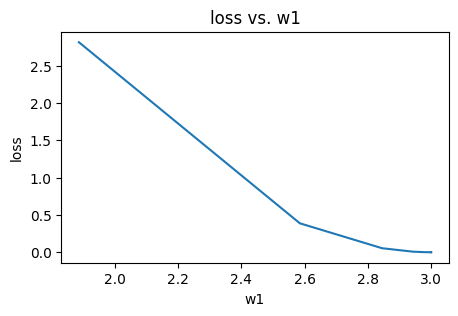

In [51]:
import matplotlib.pyplot as plt

# x = w1, y = loss, line plot
fig = plt.figure(figsize=(5, 3))
w1 = [i[0] for i in save_w_and_loss]
loss = [i[2] for i in save_w_and_loss]
plt.plot(w1, loss)
plt.xlabel('w1')
plt.ylabel('loss')
plt.title('loss vs. w1')
plt.show()


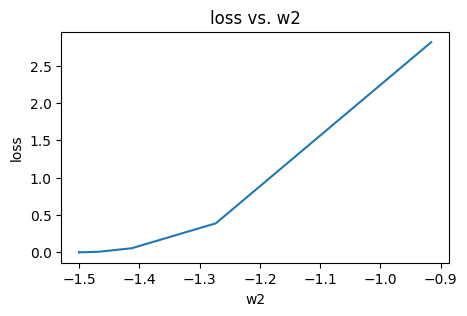

In [52]:
# x = w2, y = loss, line plot
fig = plt.figure(figsize=(5, 3))
w2 = [i[1] for i in save_w_and_loss]
loss = [i[2] for i in save_w_and_loss]
plt.plot(w2, loss)
plt.xlabel('w2')
plt.ylabel('loss')
plt.title('loss vs. w2')
plt.show()

### Concise Implementation of Linear Regression
- API 사용해보기

In [33]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [34]:
def load_array(data_arrays, batch_size, is_train=True):
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [35]:
next(iter(data_iter))

[tensor([[-0.3910, -0.3972],
         [-1.1036,  1.0120],
         [-0.0670, -1.0549],
         [ 0.6235,  0.2524],
         [ 1.1783, -0.1263],
         [ 0.2952,  0.0501],
         [-1.2831,  0.1282],
         [ 0.1399, -1.6305],
         [-1.5928,  0.2884],
         [ 0.2133, -1.3398],
         [ 0.5149, -0.0080],
         [ 1.3439,  0.4936],
         [ 0.7827, -0.9992],
         [-0.1003, -0.0987],
         [-0.2301,  0.3688],
         [ 0.4551,  0.8998],
         [-0.2728,  0.6232],
         [ 0.7034,  0.8630],
         [ 0.5275,  0.5339],
         [ 0.3874,  1.3758]]),
 tensor([[4.9119],
         [0.6681],
         [6.8742],
         [6.9883],
         [9.2219],
         [6.3170],
         [1.4300],
         [8.3631],
         [0.2934],
         [8.1555],
         [7.0688],
         [8.7788],
         [9.3464],
         [5.3511],
         [4.2586],
         [5.5149],
         [3.7478],
         [6.3226],
         [6.2721],
         [4.6259]])]

In [36]:
from torch import nn

net = nn.Sequential(nn.Linear(2,1))

In [37]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [38]:
## Loss function
loss = nn.MSELoss()

In [39]:
## Minibatch Stochastic Gradient
trainer = torch.optim.SGD(net.parameters(), lr = 0.03)

In [40]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000208
epoch 2, loss 0.000099
epoch 3, loss 0.000100


In [41]:
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:', true_b - b)

error in estimating w: tensor([0.0004, 0.0005])
error in estimating b: tensor([-5.7220e-06])
